![](img/scipy.png)

 # In this tutorial, we will learn how to perform derivation, solve differential equations, interpolation of data, fitting data to a function, integration and differentiation, linear algebra to save complex data and statistics to generate random number using different statistical distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Basic

**Optimization**

In [2]:
from scipy.optimize import minimize

Minimize $f(x) = (x-3)^2$

In [4]:
def f(x):
    return (x-3)**2

res = minimize(f,0)

In [5]:
res

      fun: 2.5388963550532293e-16
 hess_inv: array([[0.5]])
      jac: array([-1.69666681e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999998])

In [6]:
# x value that minize f 
res.x

array([2.99999998])

Minimize $f(x,y) = (x-1)^2 + (y-2.5)^2$ subject to  

$
\begin{cases}
x-2y+2\ge 0\\
-x-2y+6\ge 0\\
-x+2y+2\ge 0\\
x\ge 0\\
y\ge 0\\
\end{cases}
$



In [21]:
f = lambda x: ((x[0]-1)**2 + (x[1]-2.5)**2)
cons = ({'type':'ineq', 'fun':lambda x: x[0]-2*[1]+2},
        {'type':'ineq', 'fun':lambda x: -x[0]-2*[1]+6},
        {'type':'ineq', 'fun':lambda x: -x[0]+2*[1]+2})

bounds = ((0,None),(0,None)) # None means unbounded x and y goes from 0 to infinity

In [22]:
res = minimize(f,[2,0], bounds=bounds, constraints=cons)

In [23]:
res

     fun: 0.0
     jac: array([1.49011612e-08, 1.49011612e-08])
 message: 'Optimization terminated successfully'
    nfev: 7
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1. , 2.5])

In [24]:
# x and y values that minimize f
res.x

array([1. , 2.5])

## Interpolation

Suppose you haeve the following data (I generate here, but perhaps you collect x and y by means of some experiment)

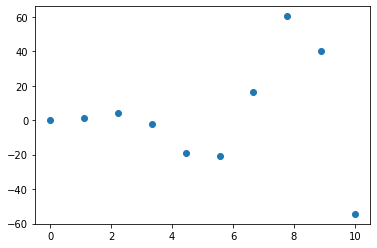

In [25]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

You want to know the values in between

In [26]:
from scipy.interpolate import interp1d

In [29]:
f = interp1d(x,y, kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)

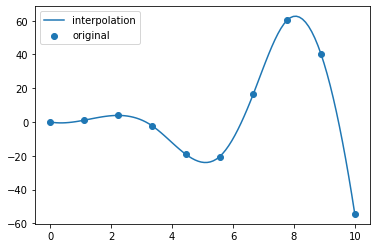

In [33]:
plt.scatter(x,y,label='original')
plt.plot(x_dense,y_dense,label='interpolation')
plt.legend()
plt.show()

## Curve fitting

Trivial example

In [35]:
x_data = np.linspace(0,10,10)
y_data = 3*x_data**2 + 2

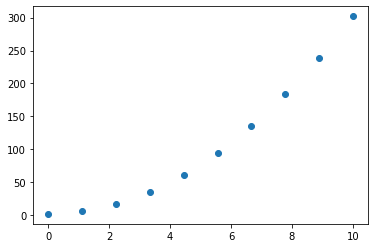

In [36]:
plt.scatter(x_data,y_data)

Want to fit the data to the curve $y=ax^2 + b$. The main goal here is to determine the values $a$ et $b$.

In [37]:
from scipy.optimize import curve_fit

def fun(x,a,b):
    return a*x**2 + b

popt, pcov = curve_fit(fun, x_data, y_data, p0=(1,1)) #pcov represent the covariances, i.e the errors of the parameters during the fitting process

In [38]:
# Optimal parameters a,b
popt

array([3., 2.])

In [45]:
t_data = np.array([ 0.  ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.])

y_data = np.array([ 3.98001666,  1.51145725, -2.56405793, -3.91351007, -1.1021844 ,
        2.88096516,  3.80112114,  0.67998934, -3.1640957 , -3.64416754,
       -0.24982201,  3.41013011,  3.44448947, -0.18327424, -3.61618387,
       -3.20442785,  0.61422178,  3.77984116,  2.92679724, -1.03796812,
       -3.89918325, -2.61485261,  1.44954524,  3.97281101,  2.27225122,
       -1.84412776, -3.9998612 , -1.90300976,  2.21708946,  3.98001666])

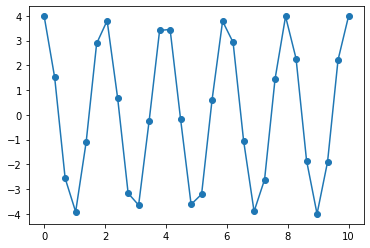

In [46]:
plt.plot(t_data,y_data,'o-')

$\omega=2\pi f, f=\dfrac{1}{T}$ and $T=2$ seconds. Thus good initial guess is
* $\omega=2\pi(1/2)=\pi$
* A = 4
* $\phi=0$

In [47]:
def func(x, A, w, phi):
    return A * np.cos(w*x+phi)

popt, pcov = curve_fit(func,t_data, y_data, p0=(4,np.pi,0))

In [59]:
A, w, phi = popt

In [51]:
t = np.linspace(0,10,100)
y = func(t, A, w, phi)

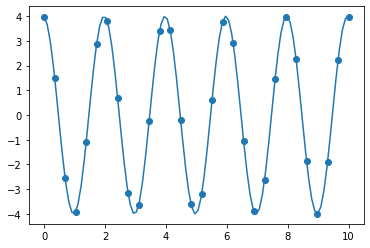

In [53]:
plt.scatter(t_data, y_data)
plt.plot(t, y)

The parameters

In [58]:
popt

array([4.        , 3.14159265, 0.1       ])

In [54]:
# The errors on the parameters are given by the diagonal of pcov matrix
pcov

array([[ 5.67938156e-19, -1.53122402e-21,  8.60036226e-21],
       [-1.53122402e-21,  4.57099325e-21, -2.27746449e-20],
       [ 8.60036226e-21, -2.27746449e-20,  1.51332554e-19]])

In [56]:
# Variances on A, w and phi 
v = np.diag(pcov)

The estimated errors on the parameters

In [57]:
# Standard deviations or erros on parameters
np.sqrt(v)

array([7.53616717e-10, 6.76091211e-11, 3.89014850e-10])

## Calculus

**Differentiation**

In [61]:
from scipy.misc import derivative

In [62]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)
x = np.linspace(0,1,100)

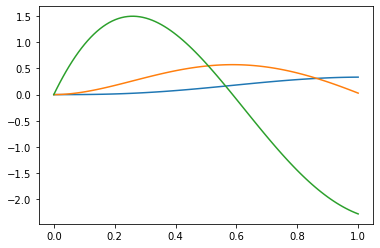

In [67]:
plt.plot(x,f(x))
plt.plot(x,derivative(f,x,dx=1e-6))
plt.plot(x,derivative(f,x,dx=1e-6,n=2)) #get second derivative

**Integration**

Single integrals       

 <center>
 $ \int_0^1 \sin(2x)e^{-x} dx$
 </center>
 


In [73]:
from scipy.integrate import quad

In [69]:
integrand = lambda x: np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [71]:
integral

0.3943343804218381

In [72]:
integral_error

4.377991085456202e-15

Double integrals

 <center>
 $ \int_0^1 \int_{-x}^{x^2} \sin(x+y^2) dydx$
 </center>

In [74]:
from scipy.integrate import dblquad

In [75]:
integrand = lambda x,y: np.sin(x+y**2)
lwr_y = lambda x:-x
upr_y = lambda x:x**2
integral, integral_error = dblquad(integrand, 0, 1,lwr_y,upr_y)

In [76]:
integral

0.315802507240474

In [77]:
integral_error

1.5634600713498928e-14

## Differential Equations

**First Order ODEs**

Air friction while failing

<center>
    $v\prime - \alpha v^2 + \beta = 0$  $v(0) = 0$
</center>    

In [78]:
from scipy.integrate import odeint

All information about differential equation

In [79]:
def dvdt(v,t):
    return 3*v**2 - 5
v0=0

Solve differential equation

In [80]:
t = np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)

In [83]:
sol.T # shape: (1,100)

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

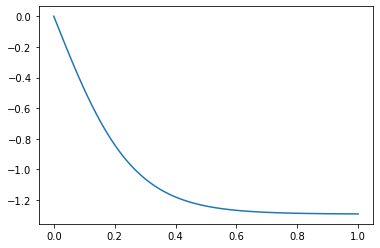

In [85]:
plt.plot(t,sol.T[0])

**Coupled fist order ODEs**

<center>
$ y_1^{'} = y_1 + y_2^2 +3x \qquad y_1(0)=0 $ <br />
$y_2^{'} = 3y_1 + y_2^3 -\cos(x) \qquad y_2(0)=0$ <br />
</center>

Letting S =($y_1,y_2$) we need to write a function that returns $dS/dx = (dy_1/dx,dy_2/dx)$


In [86]:
def dSdx(S,x):
    y1,y2 = S
    return [y1+y2**2+3*x,
           3*y1+y2**3-np.cos(x)]
y1_0 =0
y2_0 =0
S_0 = (y1_0,y2_0)

In [87]:
x = np.linspace(0,1,1000)
solv = odeint(dSdx,S_0,x)

In [90]:
solv.shape

(1000, 2)

In [91]:
y1, y2 = solv.T

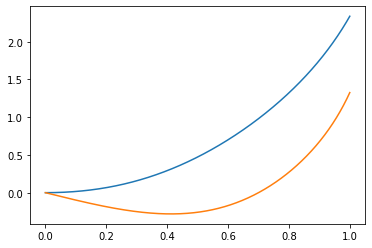

In [93]:
plt.plot(x,y1)
plt.plot(x,y2)

**Second Order ODEs**

Equation for a pendulum <br />
<center>
    $\theta^{''} - \sin(\theta) = 0$

Scipy can only solve coupled first order ODEs, but any **second order ODE can be turned into two coupled first order ODEs**.The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs. 


<center>
    $d\omega/dt =\sin(\theta)$<br/>
    $d\theta/dt = \omega$
</center>

Let $S=(\theta,\omega)$

In [94]:
def dSdx(S,t):
    theta,omega = S
    return [omega, np.sin(theta)]

In [99]:
theta_0 =np.pi/4
omega_0 = 0
S_0 = (theta_0,omega_0)

In [100]:
t = np.linspace(0,20,100)
solv = odeint(dSdx,S_0,t)

In [101]:
theta,omega = solv.T

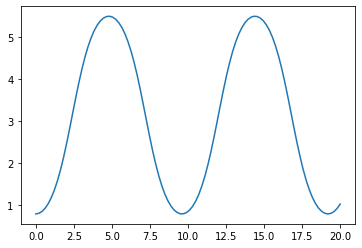

In [103]:
plt.plot(t,theta)
#plt.plot(t,omega)

## Fourier Transforms

The discrete Fourier transform is defined as
<center>
    <br/>
    $y[k] = \sum_{n=0}^{N-1} e^{-2\pi i(k/n)} x[n]$
</center>

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

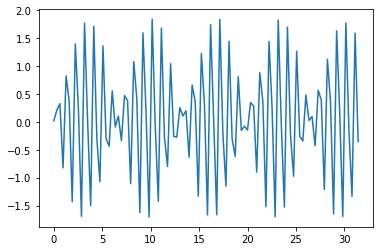

In [105]:
t = np.linspace(0,10*np.pi, 100)
x = np.sin(2*np.pi*t) +np.sin(4*np.pi*t) + 0.1*np.random.random(len(t))
plt.plot(t,x)

In [107]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x) #calculates the Fourier transform

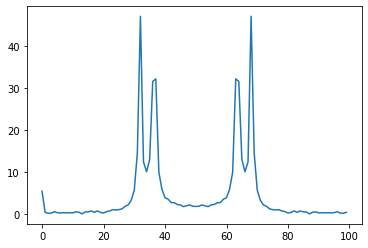

In [109]:
plt.plot(np.abs(y))

In [110]:
#Taking just positive frequencies
y = y[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]

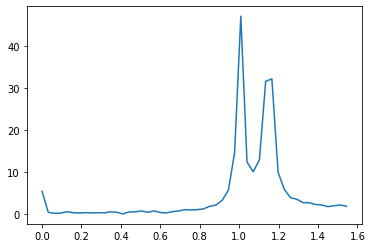

In [111]:
plt.plot(f,np.abs(y))